In [2]:
from pathlib import Path
import xarray as xr
import sys
import seaborn as sn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# Todo add colormaps for variables such as the TRMM colorscale

In [4]:
df = xr.open_dataset('dataset/TestColorScaleDset.nc')
df_geo = xr.open_dataset('dataset/Geopotential.nc')
print(df.data_vars, df_geo.data_vars)

Data variables:
    Mean_temp  (time, lat, lon) float64 ...
    Rad        (time, lat, lon) float64 ...
    Rain       (time, lat, lon) float64 ...
    SoilM      (time, lat, lon) float64 ... Data variables:
    hgt      (time, lat, lon) float32 ...


# See documentation for more information:
https://seaborn.pydata.org/tutorial/color_palettes.html#custom-diverging-palettes

In [ ]:
### variable = 'Rad'

# Select variable
hue1 = 290
hue2 = 20
# Select two input hues
saturation = 100

# Add saturation




if variable == 'hgt':
    dataset = df_geo
else:
    dataset = df


# For a dark centre use the following
#sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

cmap = sn.diverging_palette(hue1, hue2,saturation, as_cmap=True)
fig, ax = plt.subplots()
dataset[variable].isel(time =0).plot(ax = ax, cmap = cmap)

# Using Matplotlibs Colorscales


In [26]:



cmaps = {}
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']
cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

# Examples of What the Colorscales looklike

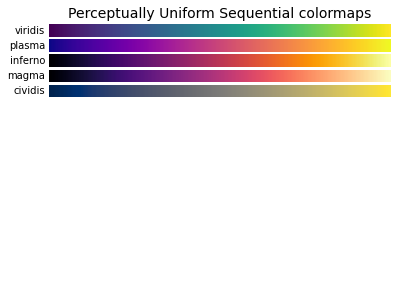

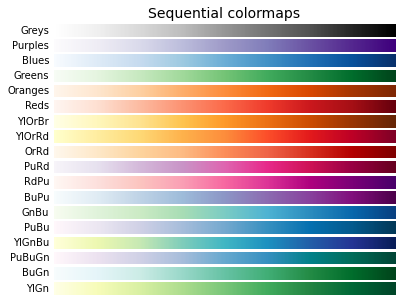

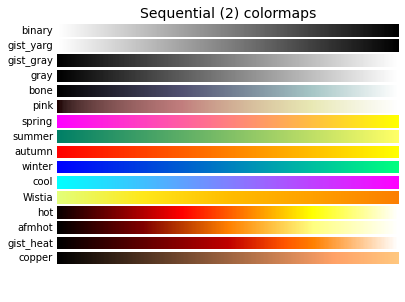

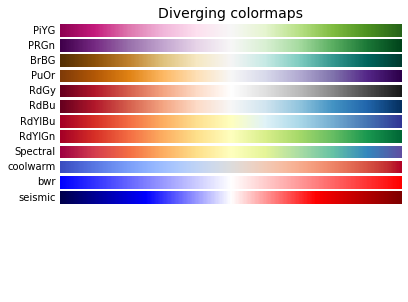

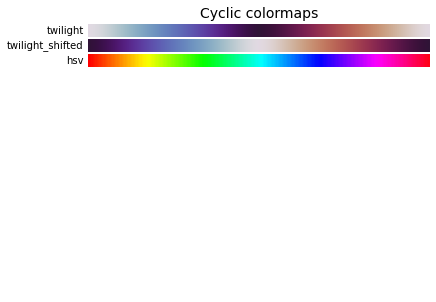

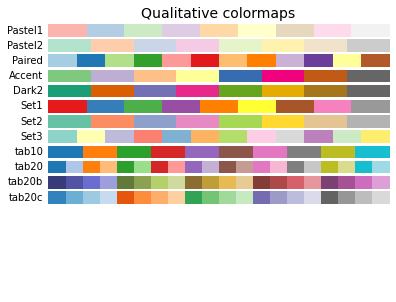

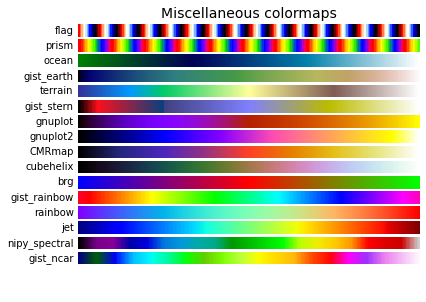

In [56]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

In [57]:
print(f"Variables are :{df.data_vars}")

Variables are :Data variables:
    Mean_temp     (time, lat, lon) float64 ...
    Rad           (time, lat, lon) float64 ...
    Rain          (time, lat, lon) float64 ...
    SoilM         (time, lat, lon) float64 ...
    Geopotential  (time, lat, lon) float32 ...


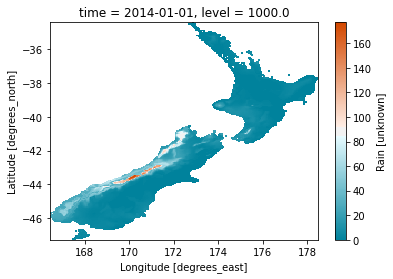

Perceptually Uniform Sequential


C:\Users\rampaln\Anaconda3\envs\Machine_Learning\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


Sequential
Sequential (2)
Diverging
Cyclic
Qualitative
Miscellaneous


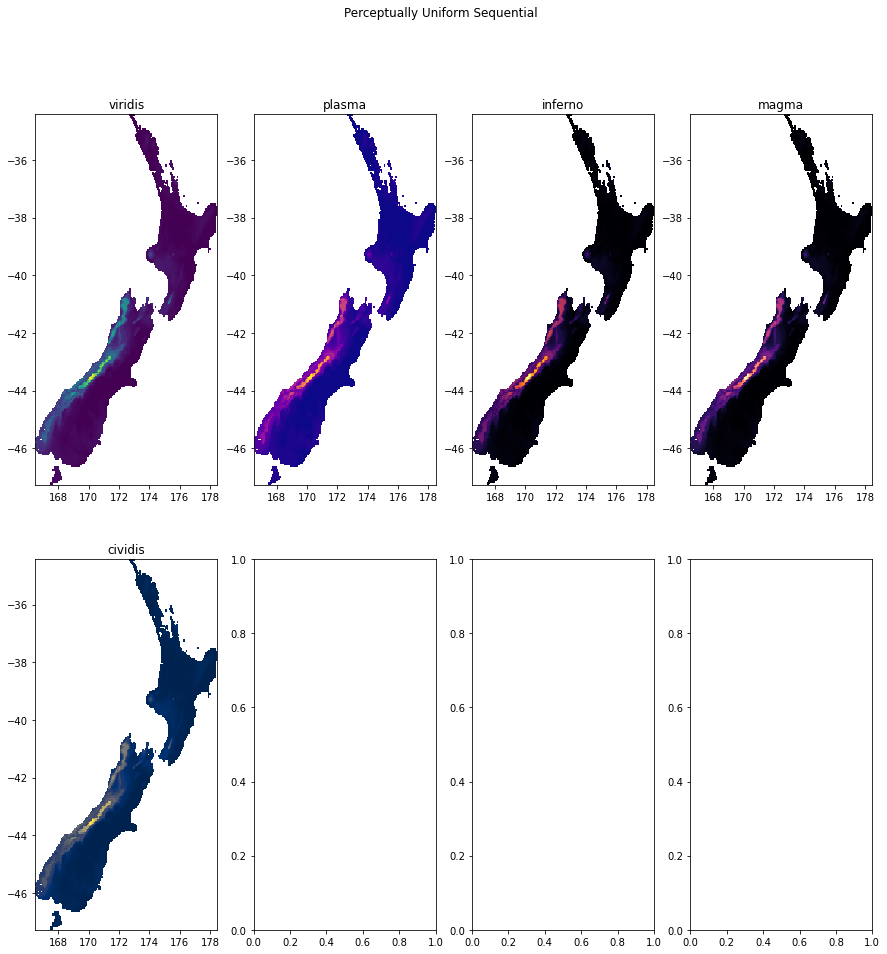

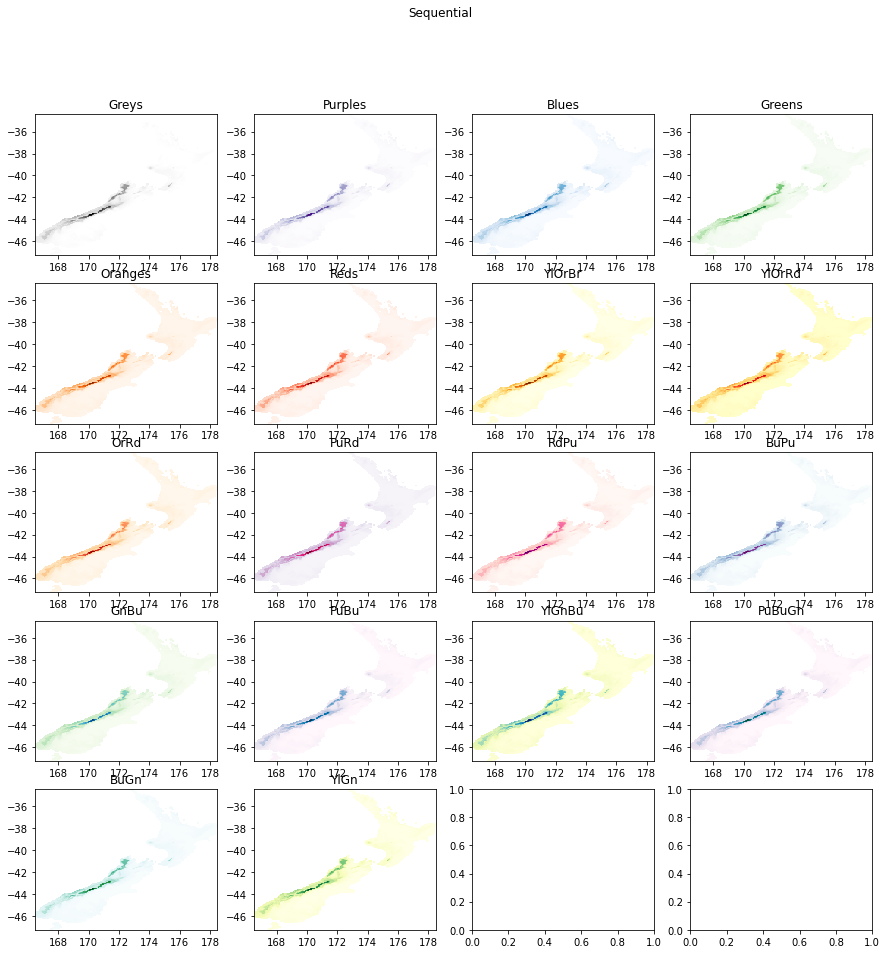

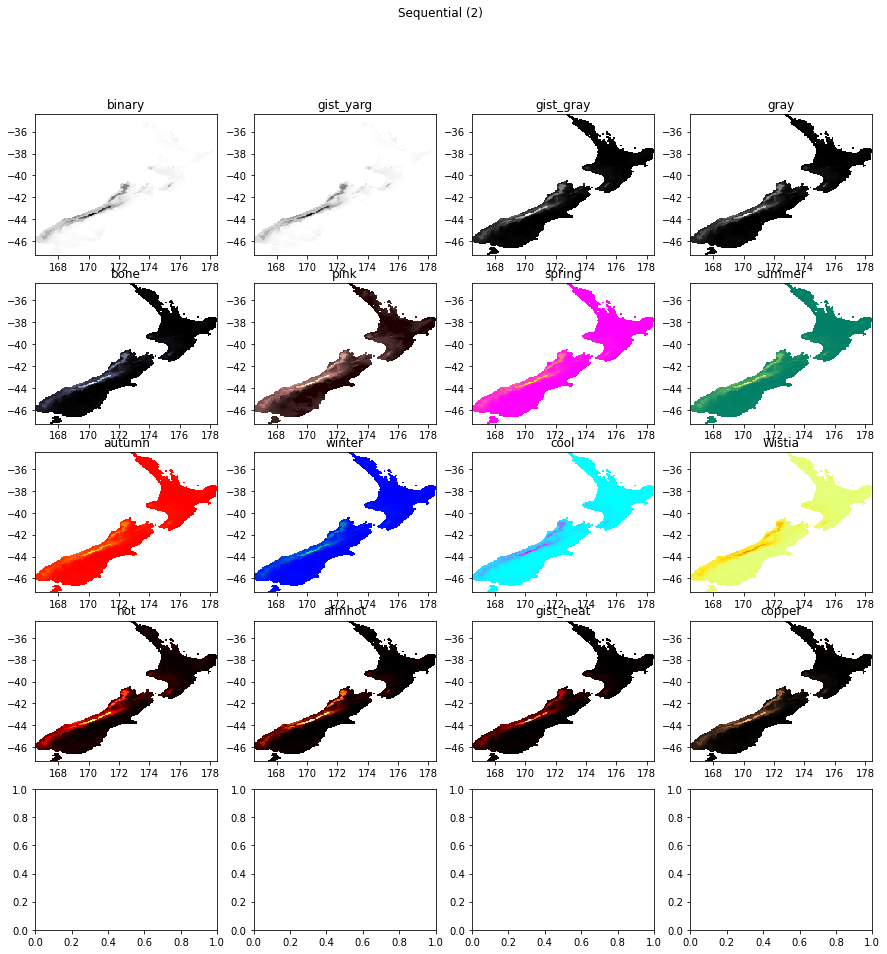

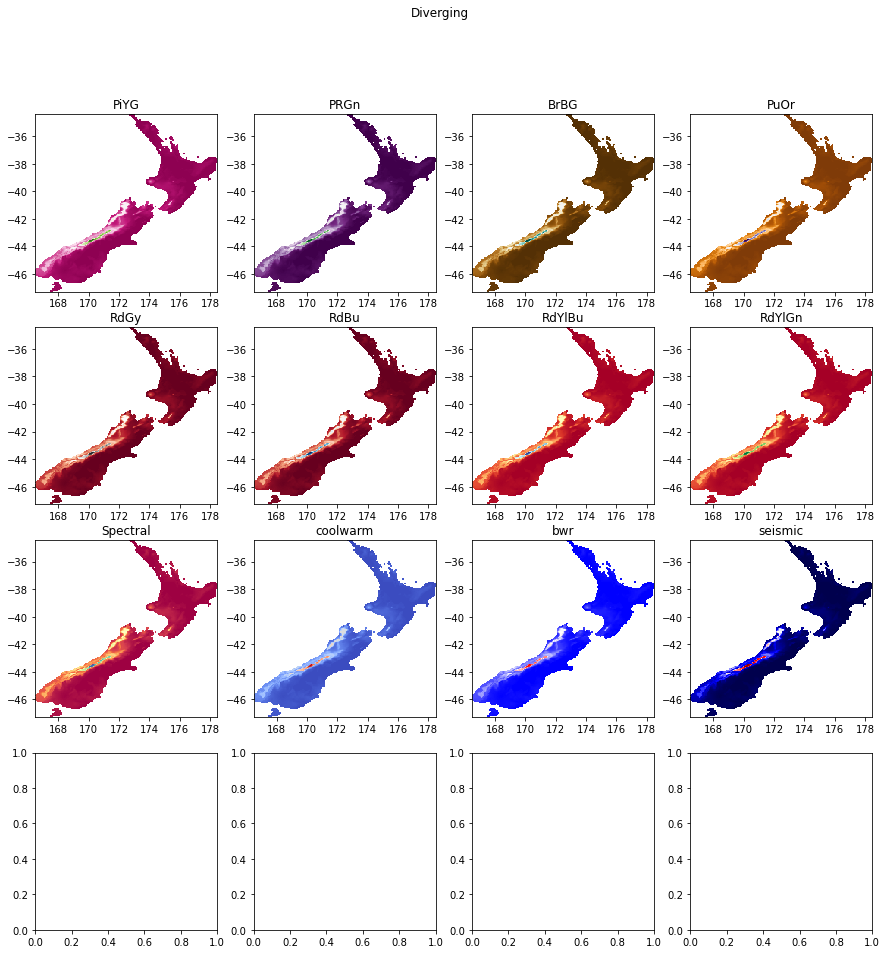

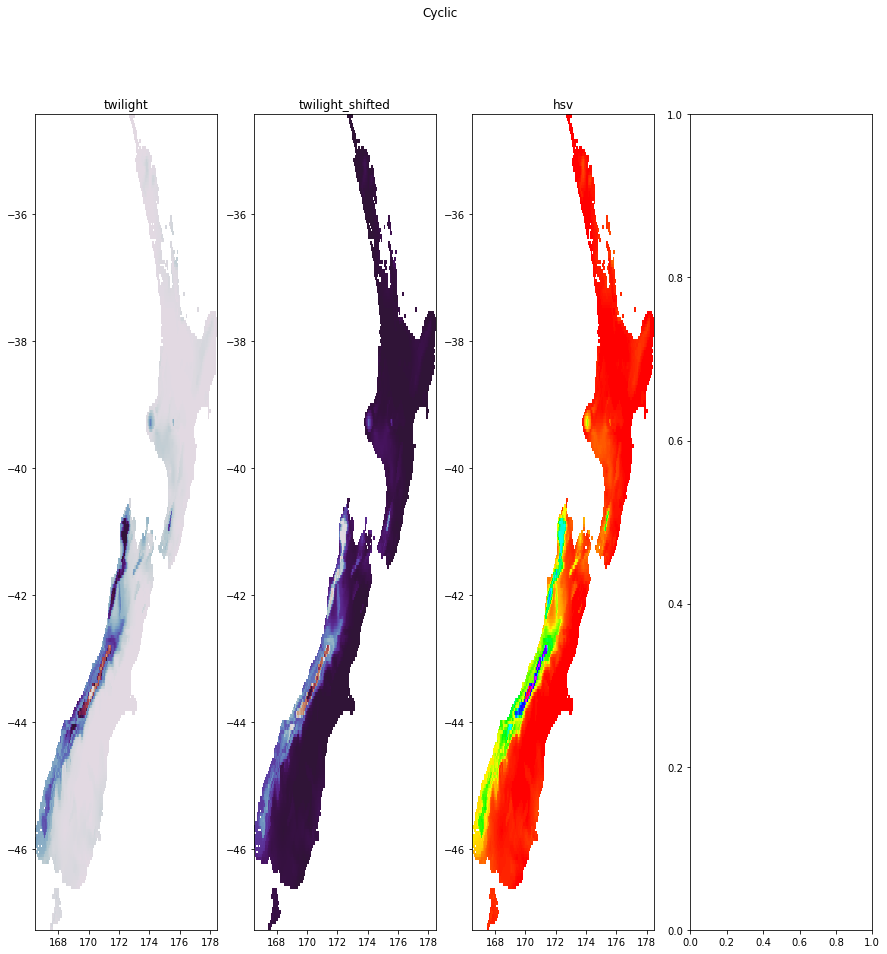

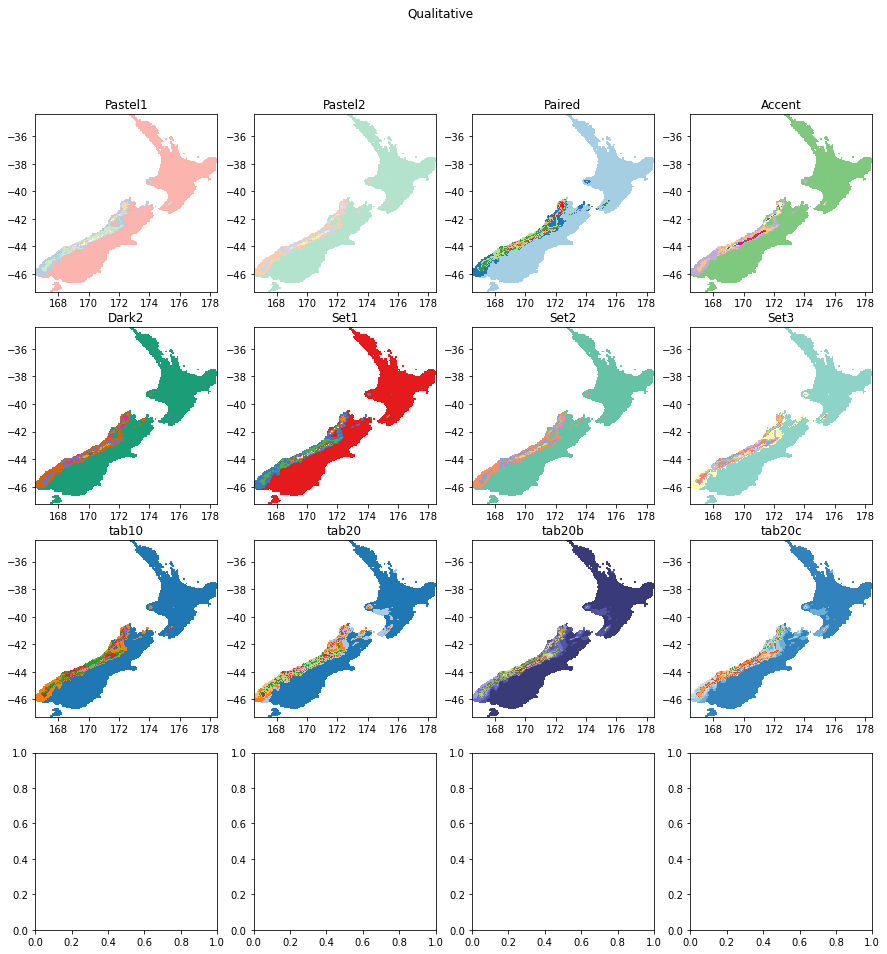

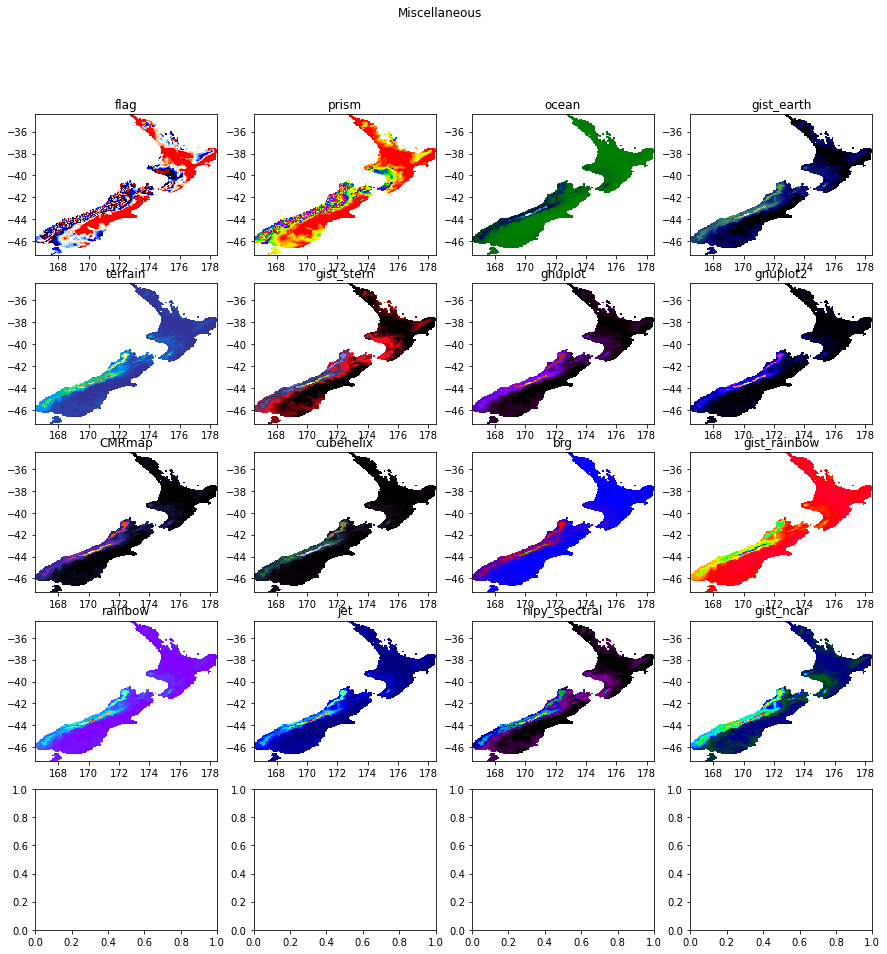

In [44]:


for key in list(cmaps.keys()):
    print(key)
    # Looping through the different types of maps
    n_plots = len(cmaps[key])//4 +1
    fig, ax = plt.subplots(n_plots, 4, figsize = (15,15))
    ax = ax.ravel()
    for i, cmap in enumerate(list(cmaps[key])[:]):
        ax[i].pcolormesh(lons, lats, df_[0], cmap =cmap)
        ax[i].set_title(cmap)
    fig.suptitle(f'{key}')
    fig.show()

